In [3]:
import numpy as np
from scipy.fft import *
from scipy.io import wavfile
import matplotlib.pyplot as plt
import pandas
import seaborn as sns
import Chords

Chords.notes_df

,C,C#,D,D#,E,F,F#,G,G#,A,A#,B
0,16.35,17.32,18.35,19.45,20.60,21.83,23.12,24.50,25.96,27.5,29.14,30.87
1,32.70,34.65,36.71,38.89,41.20,43.65,46.25,49.00,51.91,55.0,58.27,61.74
2,65.41,69.30,73.42,77.78,82.41,87.31,92.50,98.00,103.83,110.0,116.54,123.47
3,130.81,138.59,146.83,155.56,164.81,174.61,185.00,196.00,207.65,220.0,233.08,246.94
4,261.63,277.18,293.66,311.13,329.63,349.23,369.99,392.00,415.30,440.0,466.16,493.88
5,523.25,554.37,587.33,622.25,659.25,698.46,739.99,783.99,830.61,880.0,932.33,987.77
6,1046.50,1108.73,1174.66,1244.51,1318.51,1396.91,1479.98,1567.98,1661.22,1760.0,1864.66,1975.53
7,2093.00,2217.46,2349.32,2489.02,2637.02,2793.83,2959.96,3135.96,3322.44,3520.0,3729.31,3951.07
8,4186.01,4434.92,4698.63,4978.03,5274.04,5587.65,5919.91,6271.93,6644.88,7040.0,7458.62,7902.13


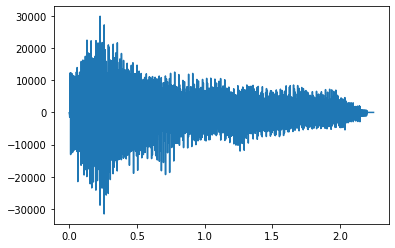

In [4]:
sample_rate, data = Chords.read_file('Major_0.wav', 0, -1)

duration = len(data)/sample_rate
time = np.arange(0,duration,1/sample_rate)
plt.plot(time,data)
plt.show()

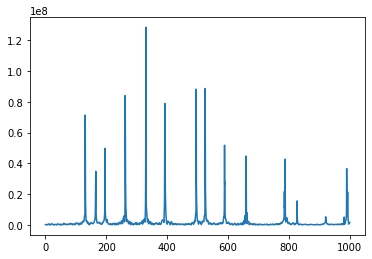

In [5]:
xf, yf = Chords.fourier_transform(sample_rate, data)

end_arg = np.abs(xf - 1000).argmin()

plt.plot(xf[:end_arg], np.abs(yf[:end_arg]))
plt.show()

In [4]:
df = Chords.note_amplitudes(xf, yf)
df

,C,C#,D,D#,E,F,F#,G,G#,A,A#,B
0,7.633478e+04,2.561650e+05,5.503249e+05,659141.241752,7.546754e+05,7.520470e+05,428813.469927,3.436155e+05,1.710211e+05,146871.876967,2.829522e+05,3.452132e+05
1,3.729122e+05,1.367645e+05,3.293037e+04,511697.657992,7.427289e+05,4.025831e+05,110884.447087,4.485868e+04,2.328838e+05,160655.291731,4.780023e+05,8.635348e+05
2,4.225929e+05,1.802443e+05,5.992681e+05,154287.851165,9.026891e+05,7.351166e+05,675569.703891,1.806178e+05,1.090305e+06,41375.433581,1.157464e+06,2.612481e+06
3,7.137906e+07,1.650119e+06,5.234233e+05,851345.268062,2.589055e+07,1.368794e+06,386063.162573,4.978144e+07,5.960343e+05,464187.375514,1.327502e+05,9.812999e+05
4,1.501988e+07,2.284852e+06,4.104582e+05,635813.717680,5.971451e+07,1.198557e+06,419384.941754,7.897001e+07,1.419504e+06,199874.951525,2.996357e+05,7.701132e+06
5,5.978710e+06,1.174173e+06,1.011475e+07,975988.308564,3.230105e+07,3.410050e+05,432989.253412,5.299527e+06,5.891941e+05,61382.980837,2.343810e+05,4.616992e+06
6,8.832817e+05,8.770777e+04,9.335807e+05,47622.417194,2.448140e+06,1.638018e+05,80890.219529,7.905257e+05,3.403345e+05,138858.129887,1.463675e+05,6.905561e+05
7,2.087688e+05,5.075761e+04,2.638888e+04,59123.814060,1.395729e+06,4.445048e+03,97643.383411,7.184506e+03,7.863359e+03,4027.004226,5.543870e+03,9.163533e+03
8,1.596190e+04,4.962473e+03,2.053846e+03,1373.244269,1.147393e+04,1.364264e+04,7119.045850,5.306570e+03,5.098962e+03,1557.280921,2.881792e+03,9.166504e+02


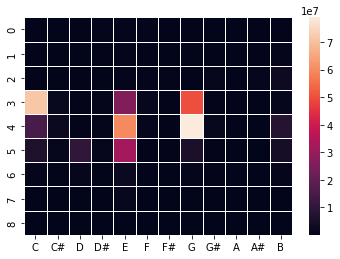

<AxesSubplot:>

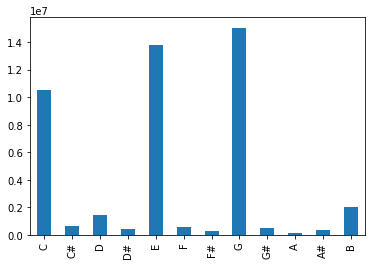

In [5]:
ax = sns.heatmap(df, linewidth=0.5)
plt.show()

df = df.apply(np.mean, axis=0)
df.plot.bar()

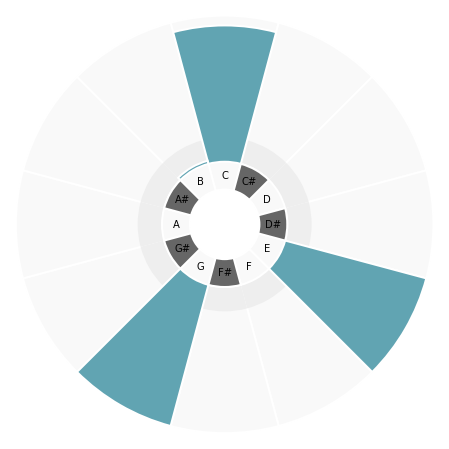

In [6]:
from CircularPlot import circular_plot

fig = circular_plot(df, '')

In [7]:
Chords.chords_df

,0,1,2
C,C,E,G
C#,C#,F,G#
D,D,F#,A
D#,D#,G,A#
E,E,G#,B
F,F,A,C
F#,F#,A#,C#
G,G,B,D
G#,G#,C,D#
A,A,C#,E


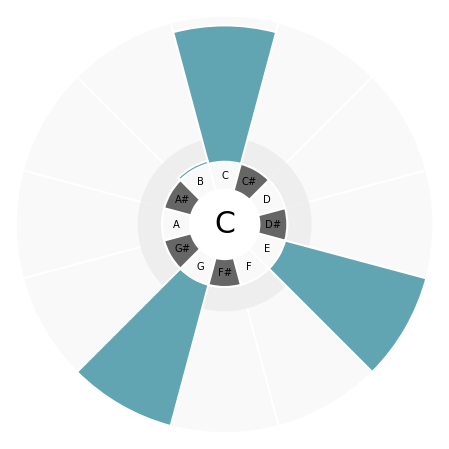

In [8]:
chord = Chords.find_chord(df)

fig = circular_plot(df, chord)

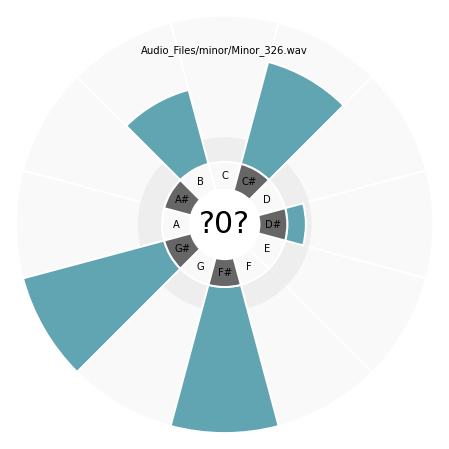

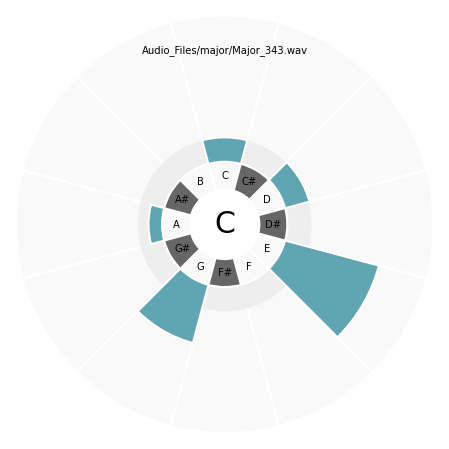

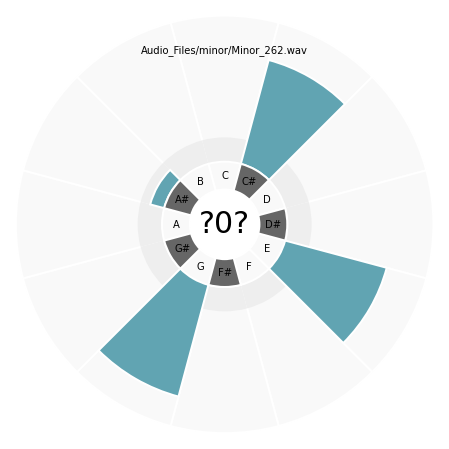

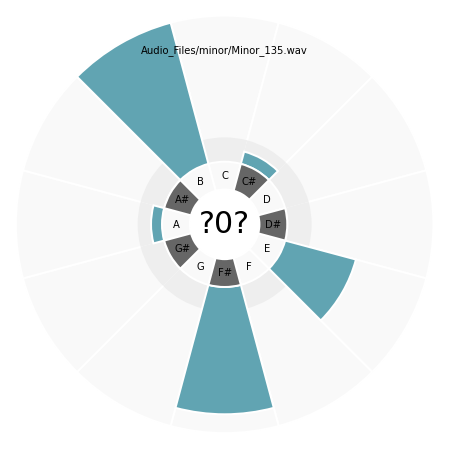

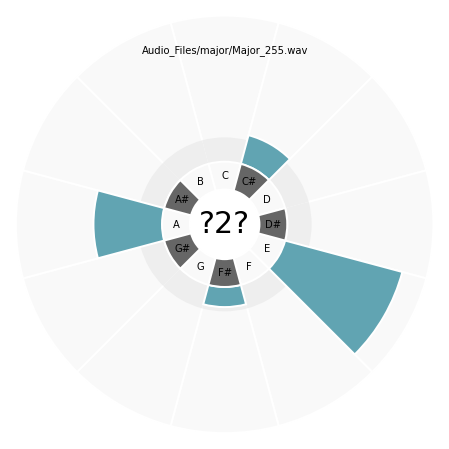

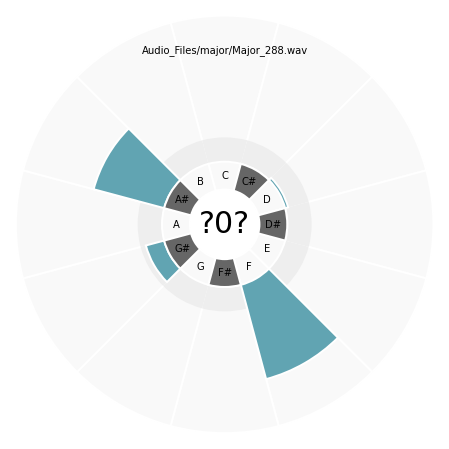

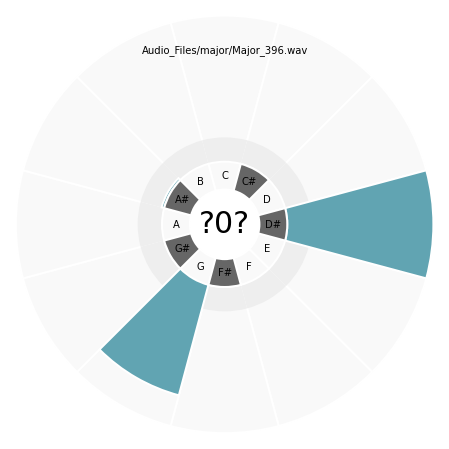

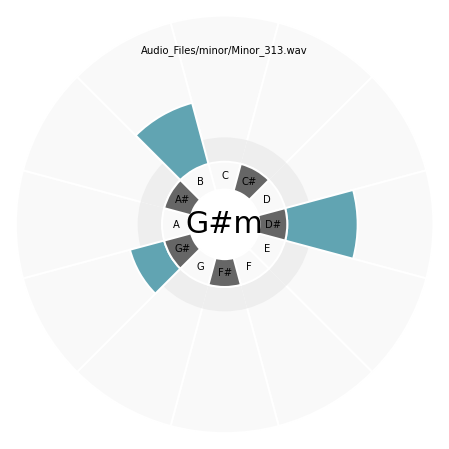

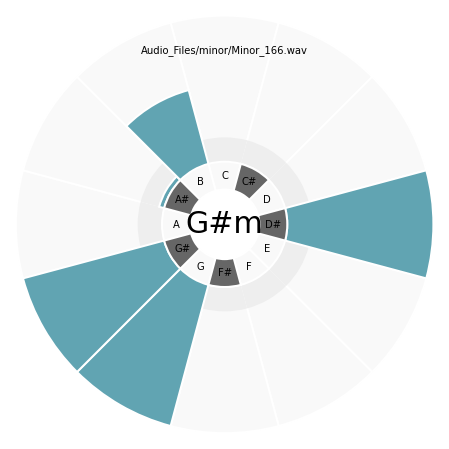

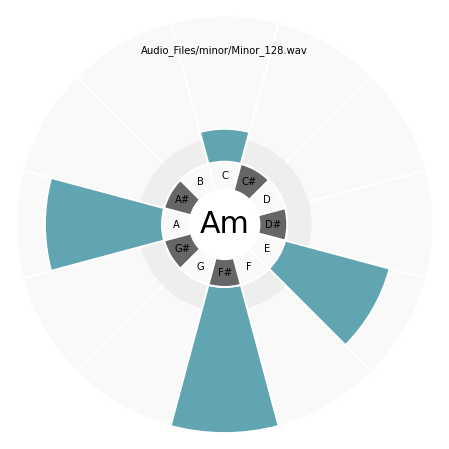

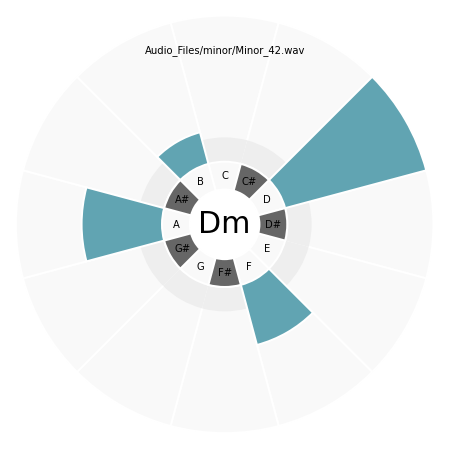

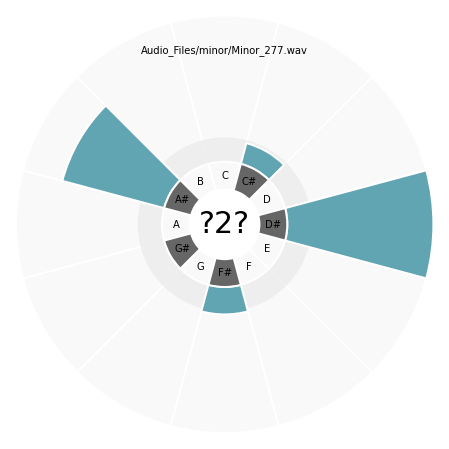

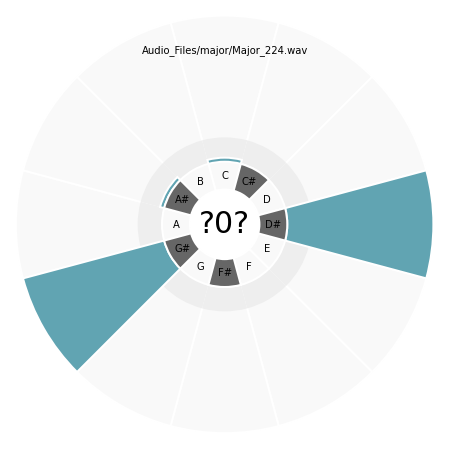

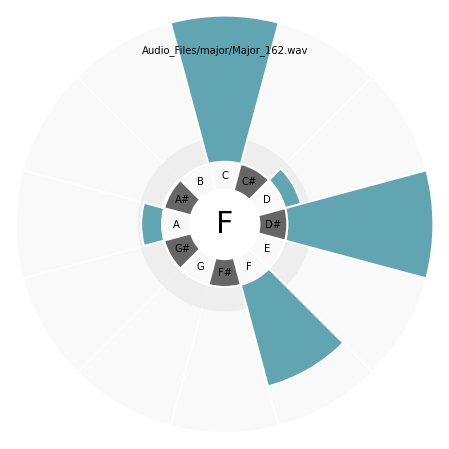

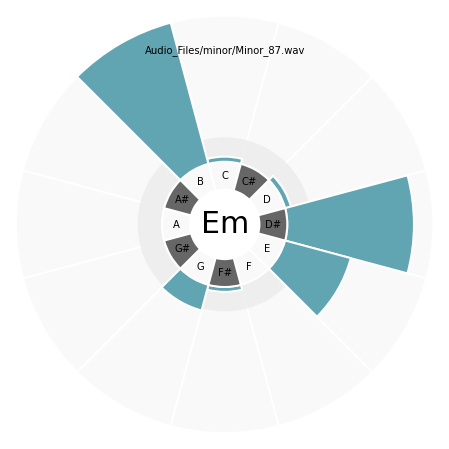

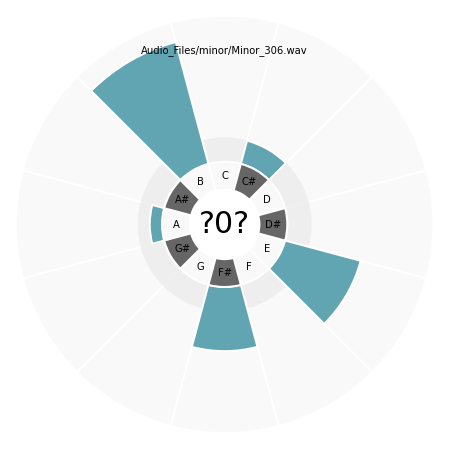

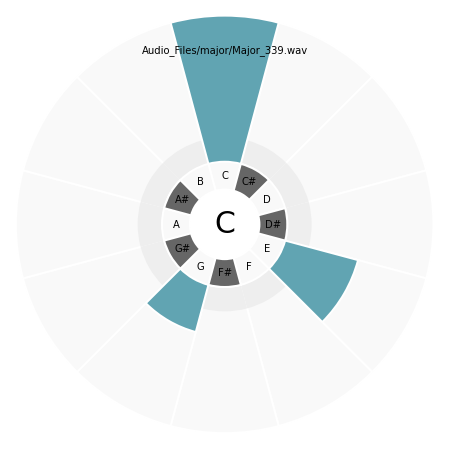

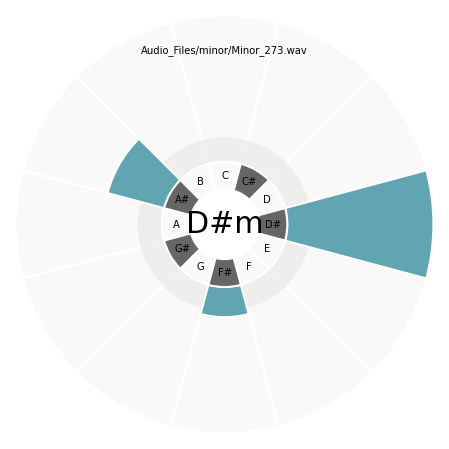

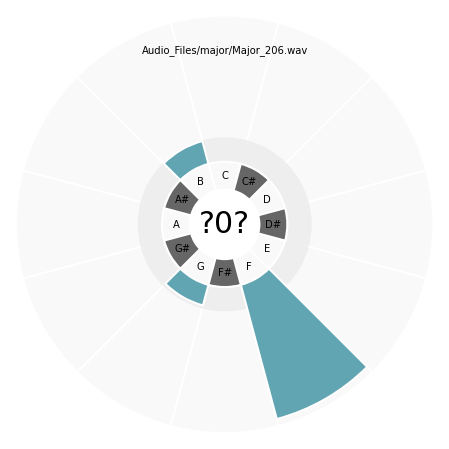

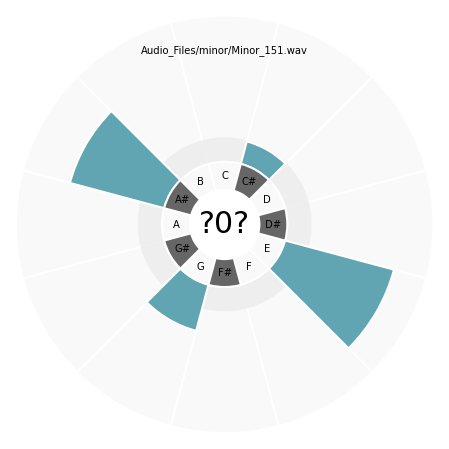

{'right': 150, 'wrong': 48, 'inconclusive': 661}


In [9]:
import os

samples = []
for ch in os.listdir('Audio_Files/major'):
    samples.append([f'Audio_Files/major/{ch}', 'Maj'])

for ch in os.listdir('Audio_Files/minor'):
    samples.append([f'Audio_Files/minor/{ch}', 'Min'])

import random
random.shuffle(samples)

stats = {
'right':0, 
'wrong': 0, 
'inconclusive': 0
}

for index, sample in enumerate(samples):
    df, ch = Chords.chord_from_file(sample[0], 100, -500)
    if(ch[-1] == '?'):
        stats['inconclusive'] += 1
    else:
        if(ch[-1] == 'm'):
            type = 'Min'
        else: 
            type = 'Maj'
        if type == sample[1]:
            stats['right'] += 1
        else:
            stats['wrong'] += 1
    if index < 20:
        circular_plot(df, ch, sample[0])
        plt.show()
        plt.close('all')
    
print(stats)

In [1]:
from ChordsMi import train_and_eval
model = train_and_eval()

0.7348837209302326
